# Exploratory analysis of quoted speech

In [1]:
from collections import Counter
import pandas as pd
%matplotlib inline
from pylab import rcParams
from bs4 import BeautifulSoup
rcParams['figure.figsize'] = 10, 4

In [2]:
import spacy
nlp = spacy.load('en')

In [7]:
with open('pride.txt') as f: 
    pride = f.read()

In [9]:
doc = nlp(pride)

In [14]:
sent0 = next(doc.sents)

In [15]:
sent0

It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.


In [74]:
for word in sent0: 
    print(word.text, word.tag_, word.pos_, word.dep_, word.head, word.lemma_)

It PRP PRON nsubj is it
is VBZ VERB ROOT is be
a DT DET det truth a
truth NN NOUN attr is truth
universally RB ADV advmod acknowledged universally
acknowledged VBD VERB conj is acknowledge
, , PUNCT punct acknowledged ,
that IN ADP mark be that
a DT DET det man a
single JJ ADJ amod man single
man NN NOUN nsubj be man
in IN ADP prep man in
possession NN NOUN pobj in possession

 SP SPACE  possession 

of IN ADP prep possession of
a DT DET det fortune a
good JJ ADJ amod fortune good
fortune NN NOUN pobj of fortune
, , PUNCT punct be ,
must MD VERB aux be must
be VB VERB ccomp acknowledged be
in IN ADP prep be in
want NN NOUN pobj in want
of IN ADP prep want of
a DT DET det wife a
wife NN NOUN pobj of wife
. . PUNCT punct is .


 SP SPACE  . 




In [3]:
def proportionWithTag(doc, tag):
    """ Returns the proportion of words in the document that have a certain POS tag. 
    If given a list instead of a tag, returns the proportions of words in the document 
    that have those tags."""
    totalWords = len(doc)
    if type(tag) == list: 
        wordsWithTag = [word for word in doc if word.tag_ in tag]
    else: 
        wordsWithTag = [word for word in doc if word.tag_ == tag]
    return len(wordsWithTag)/totalWords

def proportionWithLemma(doc, lemma): 
    totalWords = len(doc)
    wordsWithLemma = [word for word in doc if word.lemma_ == lemma]
    return len(wordsWithLemma)/totalWords

In [4]:
def beProportion(doc): 
    totalWords = len(doc)
    bes = [word for word in doc if word.lemma_ == 'be' and word.tag_ in verbtags] # 488 is "be" 
    return len(bes)/totalWords

In [5]:
[beProportion(x) for x in [doc, quoted]] 

NameError: name 'doc' is not defined

In [6]:
[proportionWithLemma(x, 'be') for x in [doc, quoted]]

NameError: name 'doc' is not defined

In [7]:
[proportionWithTag(x, 'VBZ') for x in [doc, quoted]]

NameError: name 'doc' is not defined

In [8]:
[proportionWithTag(x, 'VBZ') for x in [doc, quoted]]

NameError: name 'doc' is not defined


From the Penn Treebank table: 
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

27. 	VB 	Verb, base form
28. 	VBD 	Verb, past tense
29. 	VBG 	Verb, gerund or present participle
30. 	VBN 	Verb, past participle
31. 	VBP 	Verb, non-3rd person singular present
32. 	VBZ 	Verb, 3rd person singular present 

In [149]:
presentVerbTags = ['VB', 'VBG', 'VBP', 'VBZ']
verbtags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

In [83]:
[proportionWithTag(x, presentVerbTags) for x in [doc, quoted]]

[0.07910406178526769, 0.12875536480686695]

In [59]:
VBZproportion(doc)

0.009692823034708859

In [60]:
VBZproportion(sent0)

0.03571428571428571

Scraped from: https://kindle.amazon.com/work/pride-prejudice-jane-austen-ebook/B00K1K87SQ/B008476HBM
and from: https://web.archive.org/web/20140821065046/https://kindle.amazon.com/work/pride-prejudice-jane-austen-ebook/B000AGXUCE/B000JMLFLW

>It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.

11996 Highlighters

>Pride relates more to our opinion of ourselves, vanity to what we would have others think of us."

11799 Highlighters

>In vain I have struggled. It will not do. My feelings will not be repressed. You must allow me to tell you how ardently I admire and love you.

5841 Highlighters

>Happiness in marriage is entirely a matter of chance. If the dispositions of the parties are ever so well known to each other or ever so similar beforehand, it does not advance their felicity in the least. They always continue to grow sufficiently unlike afterwards to have their share of vexation; and it is better to know as little as possible of the defects of the person with whom you are to pass your life."

5788 Highlighters

>There are few people whom I really love, and still fewer of whom I think well. The more I see of the world, the more am I dissatisfied with it; and every day confirms my belief of the inconsistency of all human characters, and of the little dependence that can be placed on the appearance of merit or sense.

5290 Highlighters

Popular Highlights

>there are very few of us who have heart enough to be really in love without encouragement.

8300 Highlighters

>Vanity and pride are different things, though the words are often used synonymously. A person may be proud without being vain. Pride relates more to our opinion of ourselves, vanity to what we would have others think of us."

7627 Highlighters

>"Pride," observed Mary, who piqued herself upon the solidity of her reflections, "is a very common failing,

5494 Highlighters


In [9]:
quoted_passages = ["""It is a truth universally acknowledged, 
 that a single man in possession of a good fortune, must be in want of a wife.""",
"""In vain I have struggled. It will not do. My feelings will not be repressed. 
You must allow me to tell you how ardently I admire and love you.""",
"""Happiness in marriage is entirely a matter of chance. If the dispositions of the parties are ever 
so well known to each other or ever so similar beforehand, 
it does not advance their felicity in the least. 
They always continue to grow sufficiently unlike afterwards to have their share of vexation; 
and it is better to know as little as possible of the defects of the person with whom you are to pass your life.""",
"""There are few people whom I really love, and still fewer of whom I think well. 
The more I see of the world, the more am I dissatisfied with it; 
and every day confirms my belief of the inconsistency of all human characters, 
and of the little dependence that can be placed on the appearance of merit or sense.""",
""""Pride," observed Mary, who piqued herself upon the solidity of her reflections, "is a very common failing,""",
"""Vanity and pride are different things, though the words are often used synonymously. 
A person may be proud without being vain. Pride relates more to our opinion of ourselves, 
vanity to what we would have others think of us."""
]

In [159]:
joined = ' '.join(quoted_passages)

In [160]:
quoted = nlp(joined)

In [10]:
tagDict = {"CC": "Coordinating conjunction",
"DT": "Determiner",
"EX": "Existential there",
"IN": "Preposition or subordinating conjunction",
"JJ": "Adjective",
"JJR": "Adjective, comparative",
"JJS": "Adjective, superlative",
"MD": "Modal",
"NN": "Noun, singular or mass",
"NNS": "Noun, plural",
"NNP": "Proper noun, singular",
"NNPS": "Proper noun, plural",
"PDT": "Predeterminer",
"POS": "Possessive ending",
"PRP": "Personal pronoun",
"PRP$": "Possessive pronoun",
"RB": "Adverb",
"RBR": "Adverb, comparative",
"RBS": "Adverb, superlative",
"RP": "Particle",
"TO": "to",
"UH": "Interjection",
"VB": "Verb, base form",
"VBD": "Verb, past tense",
"VBG": "Verb, gerund or present participle",
"VBN": "Verb, past participle",
"VBP": "Verb, non-3rd person singular present",
"VBZ": "Verb, 3rd person singular present",
"WDT": "Wh-determiner",
"WP": "Wh-pronoun",
"WP$": "Possessive wh-pronoun",
"WRB": "Wh-adverb"}

In [11]:
tagset = list(tagDict.keys())

In [12]:
def compareTags(a, b, tagset):
    proportionsDict = {}
    for tag in tagset: 
        proportionsDict[tag] = [proportionWithTag(x, tag) for x in [a, b]]
    df = pd.DataFrame(proportionsDict).T
    df['factor'] = df[1]/df[0]
    df['factor'].plot(kind="bar")

In [13]:
compareTags(doc, quoted, tagset)

NameError: name 'doc' is not defined

In [14]:
def compareLemmas(a, b, lemmas):
    proportionsDict = {}
    for lemma in lemmas: 
        proportionsDict[lemma] = [proportionWithLemma(x, lemma) for x in [a, b]]
    df = pd.DataFrame(proportionsDict).T
    df['factor'] = df[1]/df[0]
    df['factor'].plot(kind="bar")

In [15]:
compareLemmas(doc, quoted, ['be', 'have', 'do'])

NameError: name 'doc' is not defined

In [16]:
# Read annotated edition of Middlemarch
with open('annotated.html') as f: 
    annotated = f.read()

In [17]:
# Parse 
soup = BeautifulSoup(annotated, 'lxml')

levels = [soup.find_all('span', 'c-'+str(level)) for level in range(17)]

# Remove HTML tags. 
cleanLevels = []
for level in levels: 
    cleanLevel = [quote.get_text() for quote in level]
    cleanLevels.append(cleanLevel)

In [18]:
unquoted = cleanLevels[0]
quotedGroups = cleanLevels[1:]

In [19]:
quoted = []
for group in quotedGroups: 
    quoted.extend(group)

In [20]:
quoted = ' '.join(quoted)
unquoted = ' '.join(unquoted)

In [21]:
len(quoted)

301396

In [22]:
quotes = nlp(quoted)
nonquotes = nlp(unquoted)

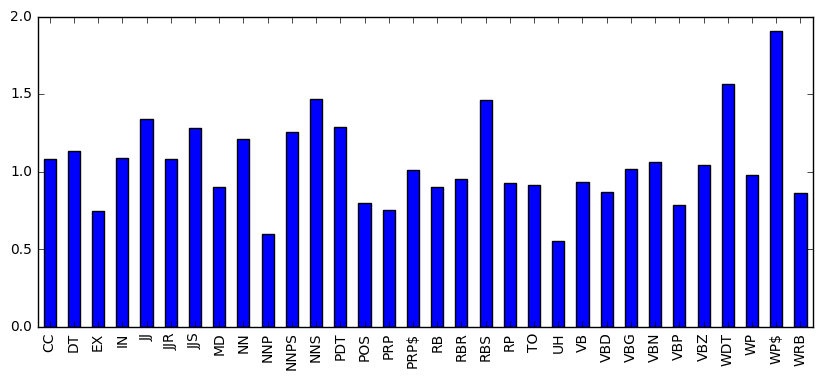

In [23]:
compareTags(nonquotes, quotes, tagset)

In [24]:
tagDict['WDT']

'Wh-determiner'

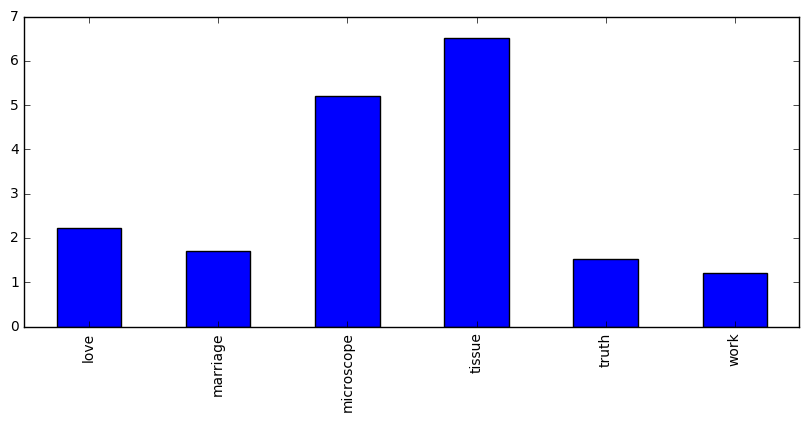

In [27]:
compareLemmas(nonquotes, quotes, ['love', 'marriage', 'work', 'microscope', 'truth', 'tissue'])

In [28]:
with open('quoted.txt', 'w') as f: 
    f.write(quoted)

301396

In [29]:
len(unquoted)

1494144

In [30]:
len(cleanLevels)

17

In [32]:
pd.DataFrame(cleanLevels).shape

(17, 1313)